In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV,Ridge
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
california_data = datasets.fetch_california_housing()
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)
data['target'] = pd.Series(california_data.target)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data.shape

(20640, 9)

We can see that we have 20640 rows and 9 columns

(I):Data preprocessing


Dealing with missing values

In [ ]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

We find out that the dataset has no null values

Feature Selection

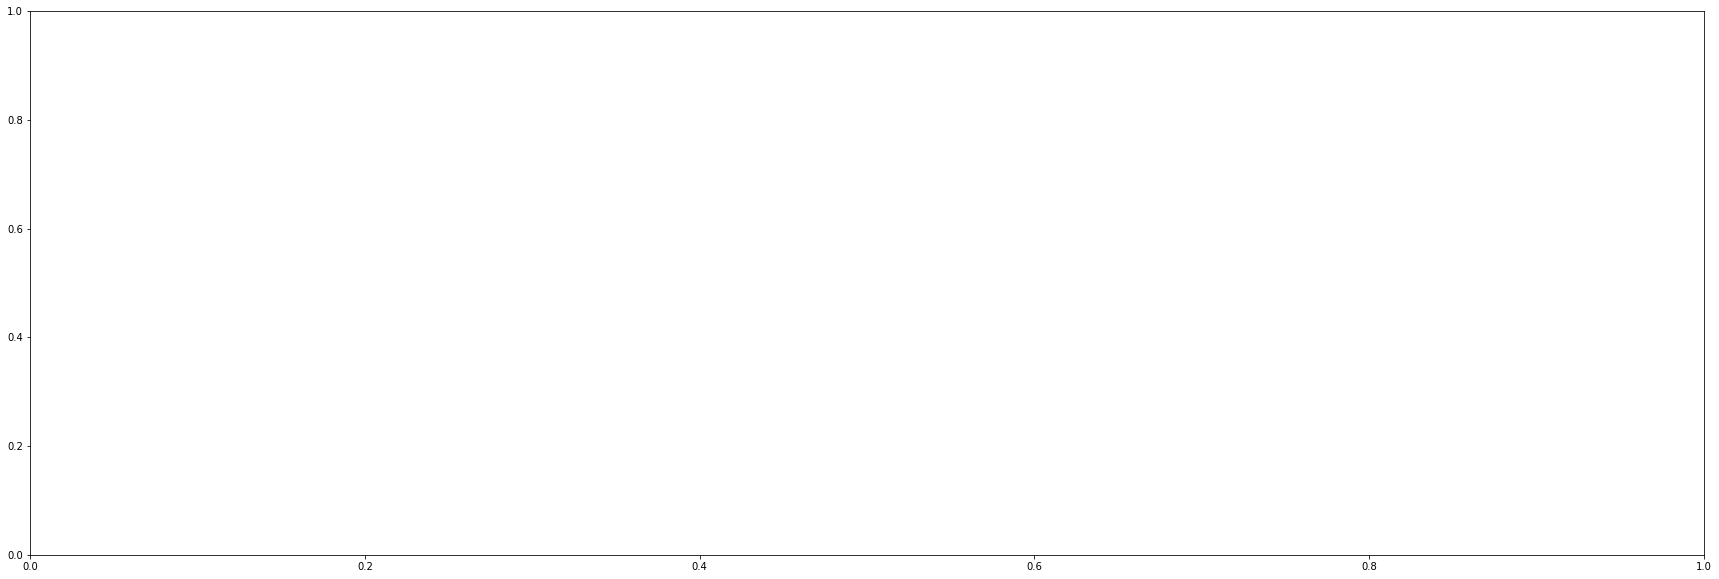

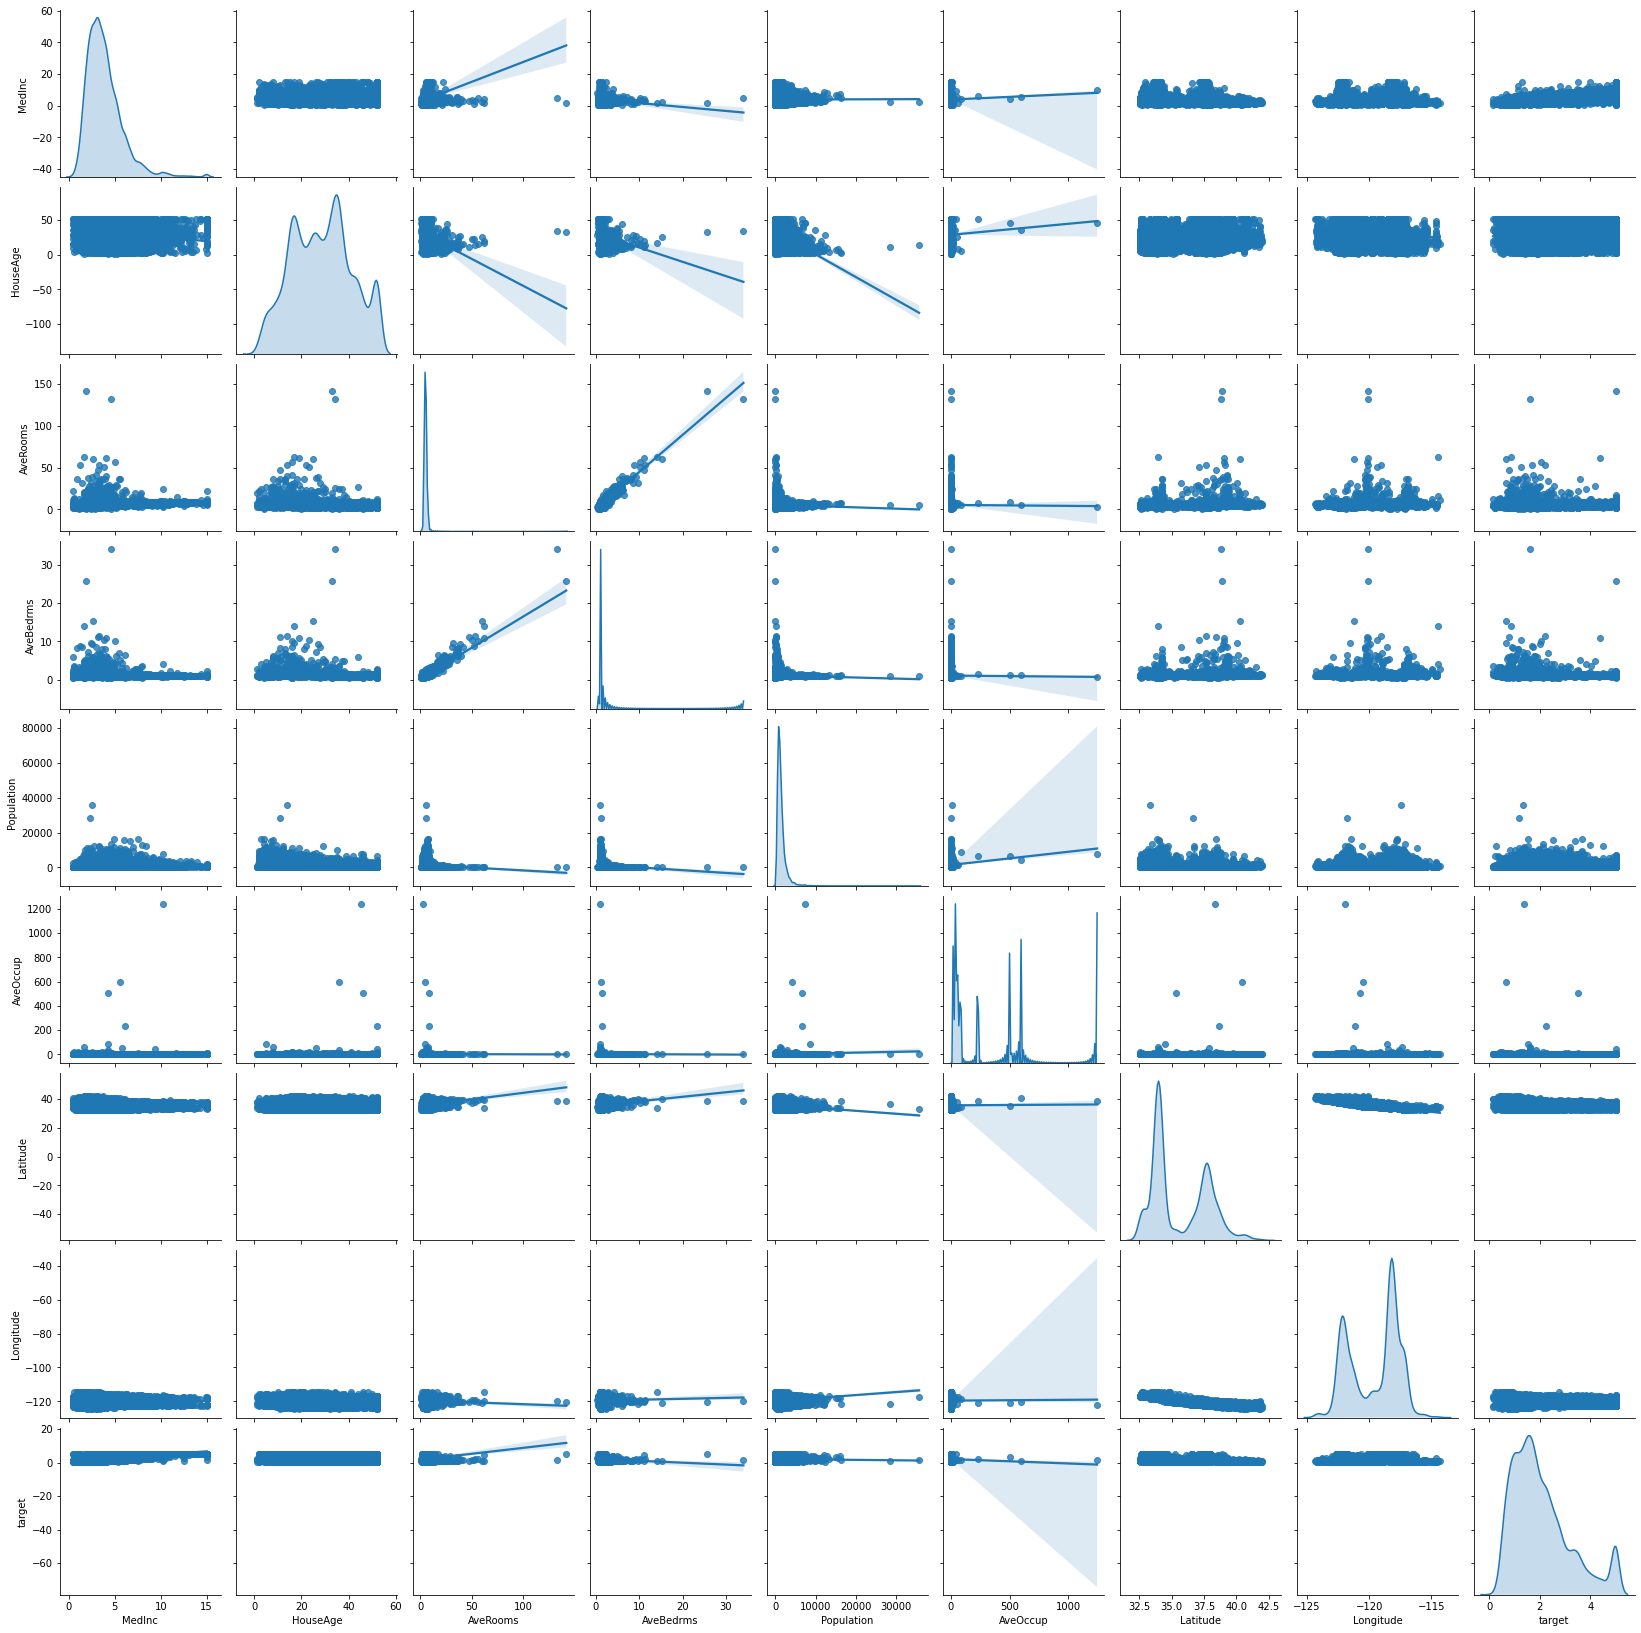

In [ ]:
correlation = data.corr()
plt.subplots(figsize=(30,10))
#sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )
#visualize the skewness
data_before = data.copy()
data_before.drop(columns=['target'],axis=1)
sns.pairplot(data,kind='reg', diag_kind='kde')

Feature extraction and dimensionality reduction

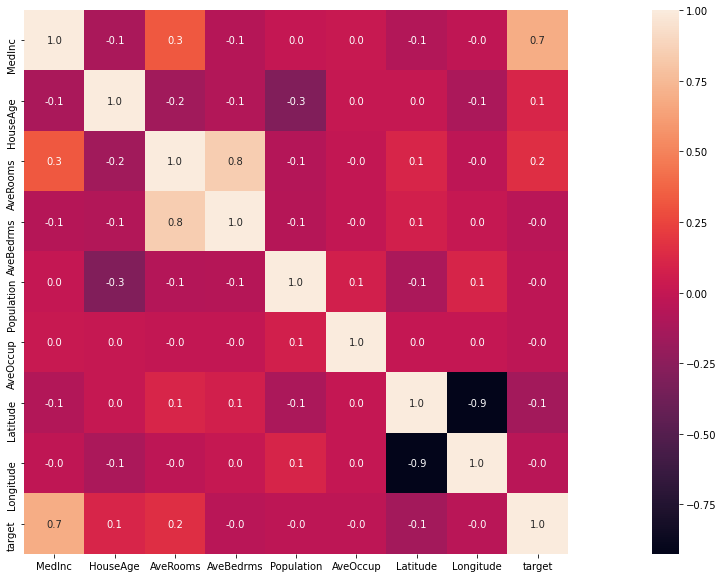

In [ ]:
correlation = data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )
#Save the visual
#plt.savefig('HeatMapCorrelation.png', dpi = 100)

From the above correlation plot, we can observe that AveBedrooms and AverageRooms have a highcorrelation of 0.8. This means that the two variables are very correlated to each other that they may affect the prediction of the target during model training. Hence, I will drop averageBedrooms because when compared to the target, it is the least correlated to it. Hence a less important feature compared to averageRooms

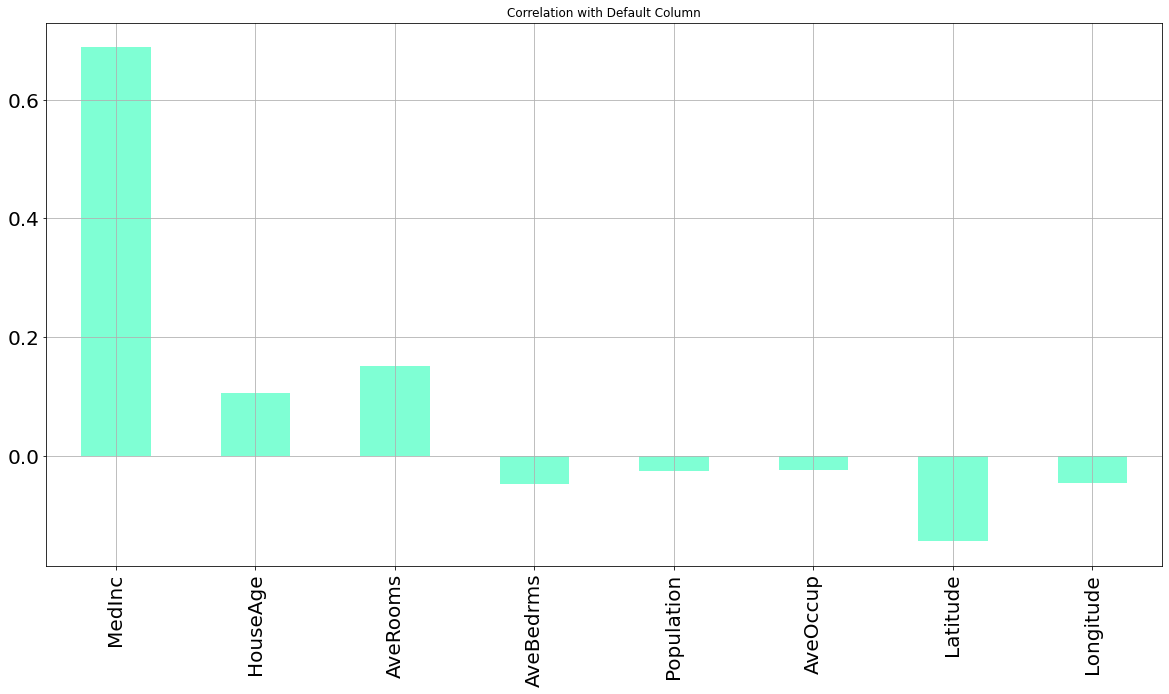

In [ ]:
y = data.drop(['target'],axis=1)
y.corrwith(data['target']).plot.bar(figsize = (20, 10), title = "Correlation with Default Column", 
                                        fontsize = 20,rot = 90, grid = True, color='aquamarine')

The above is just a plot of all the features in relation to the target, just to confirm their correlation.
1. We can see that MedIncome is the most correlated with the target, het giving the impression that its a very important feature.

In [ ]:
data.drop(['AveBedrms'],axis = 1, inplace = True)
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
target=['target']
target

['target']

In [ ]:
pre_data = data.drop(columns=['target'],axis=1)
all_features = list(pre_data.columns)
len(all_features)
#all_features


7

In [ ]:
new_data = pd.concat([pre_data,data[target]],axis=1)
new_data
all_features = list(new_data.columns)
all_features
X = new_data.loc[:,all_features[0]:all_features[-2]].values
y = new_data.loc[:,[all_features[-1]]].values
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [ ]:
X = PowerTransformer().fit_transform(X)
y = PowerTransformer().fit_transform(y)

In [ ]:
pca_with_varia = PCA(0.9)
pc_s = pca_with_varia.fit_transform(X)
pca_with_varia.n_components_
#Get the 5 features from the 90%
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
target_data = pd.DataFrame(y,columns=['target'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,target
0,2.363147,-1.288347,-1.655268,0.937633,-0.345637,1.715878
1,1.658119,-1.919674,0.565541,-0.905540,-1.467338,1.281389
2,2.322035,-1.228937,-1.542531,1.668567,-0.741540,1.247506
3,2.182669,-0.089342,-1.273990,1.065300,-0.914215,1.188835
4,2.338215,0.298886,-1.399570,0.473772,-0.741092,1.193798
...,...,...,...,...,...,...
20635,1.647060,1.140120,0.602044,-0.487212,1.023021,-1.414289
20636,1.819092,-0.095887,0.131017,0.198912,1.923765,-1.433165
20637,1.656364,0.688147,0.829426,-1.149028,1.058538,-1.160803
20638,1.897572,0.612091,0.312724,-1.337667,1.066061,-1.293200


In [ ]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['target'])
final_data_2 = pd.concat([pca_data,target_data],axis=1)
final_data_2

,PC1,PC2,target
0,2.363147,-1.288347,1.715878
1,1.658119,-1.919674,1.281389
2,2.322035,-1.228937,1.247506
3,2.182669,-0.089342,1.188835
4,2.338215,0.298886,1.193798
...,...,...,...
20635,1.647060,1.140120,-1.414289
20636,1.819092,-0.095887,-1.433165
20637,1.656364,0.688147,-1.160803
20638,1.897572,0.612091,-1.293200


In [ ]:
pca_with_varia.explained_variance_ratio_

array([0.29400944, 0.24080826, 0.1750774 , 0.1348876 , 0.09672168])

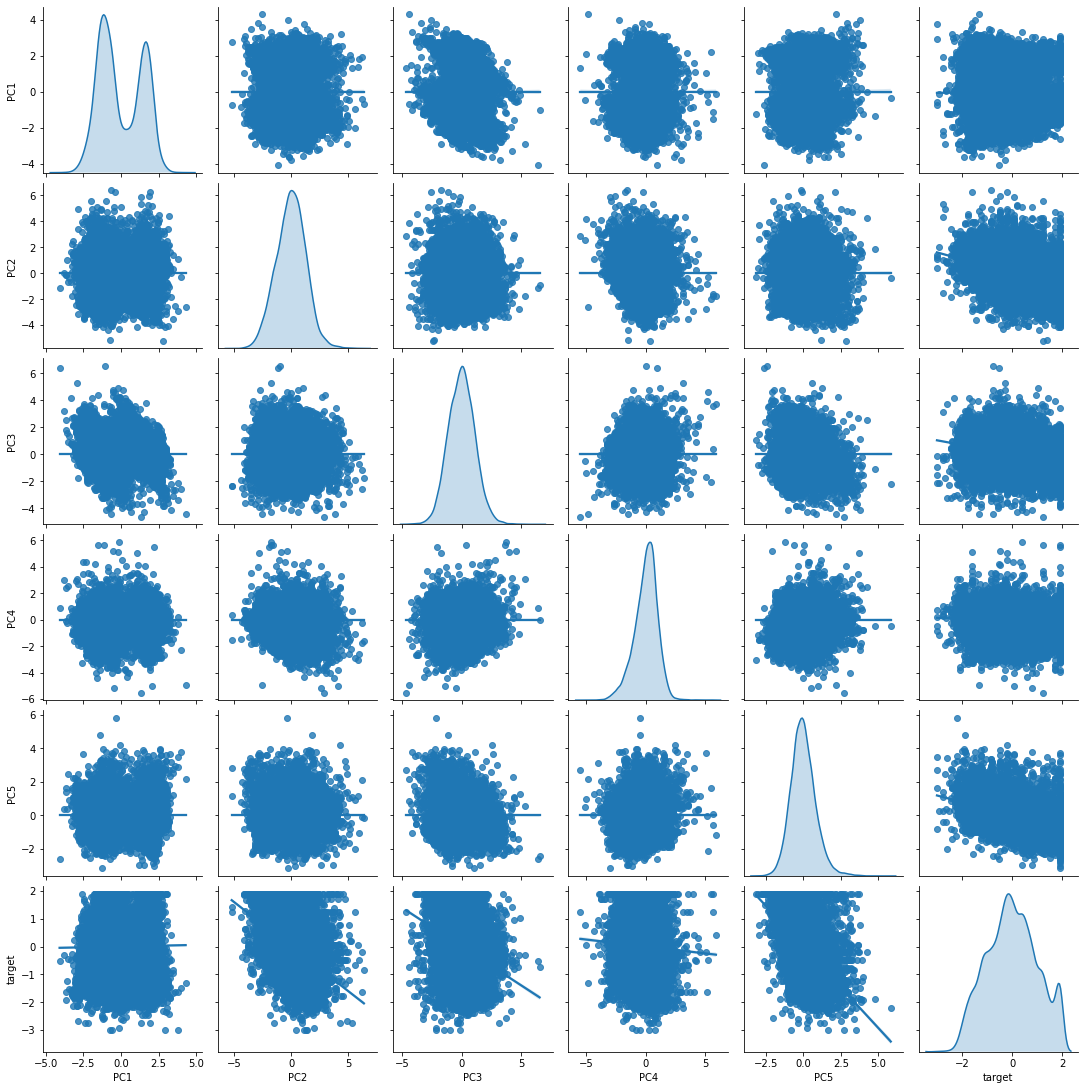

In [ ]:
sns.pairplot(final_data,kind='reg', diag_kind='kde')

(II)Data distribution

In [ ]:
vis = sns.pairplot(data)

**3 Model training**

In [ ]:
final_data

,PC1,PC2,PC3,PC4,PC5,target
0,2.363147,-1.288347,-1.655268,0.937633,-0.345637,1.715878
1,1.658119,-1.919674,0.565541,-0.905540,-1.467338,1.281389
2,2.322035,-1.228937,-1.542531,1.668567,-0.741540,1.247506
3,2.182669,-0.089342,-1.273990,1.065300,-0.914215,1.188835
4,2.338215,0.298886,-1.399570,0.473772,-0.741092,1.193798
...,...,...,...,...,...,...
20635,1.647060,1.140120,0.602044,-0.487212,1.023021,-1.414289
20636,1.819092,-0.095887,0.131017,0.198912,1.923765,-1.433165
20637,1.656364,0.688147,0.829426,-1.149028,1.058538,-1.160803
20638,1.897572,0.612091,0.312724,-1.337667,1.066061,-1.293200


In [ ]:
trial = final_data.iloc[:,:-1].values
trial

array([[ 2.36314655, -1.28834743, -1.65526842,  0.93763295, -0.34563696],
       [ 1.65811924, -1.91967372,  0.56554118, -0.9055397 , -1.46733839],
       [ 2.32203521, -1.22893728, -1.54253109,  1.66856744, -0.74153961],
       ...,
       [ 1.65636436,  0.68814741,  0.82942624, -1.14902812,  1.058538  ],
       [ 1.89757188,  0.61209132,  0.31272399, -1.33766656,  1.06606131],
       [ 1.45398104,  0.11518386,  1.22340965, -0.75351864,  0.70163786]])

In [ ]:
X = final_data.iloc[:,:-1].values
y = final_data.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [ ]:
X_train.shape

(16512, 5)

In [ ]:
X_test.shape

(4128, 5)

I'll start by training it on a Linear Regression Model





In [ ]:
clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test,y_pred))

0.49169147830866844


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

RSquared = r2_score(y_test, y_pred)



results = pd.DataFrame([['Linear Regression Model', RSquared]],
               columns = ['Model', 'R-Squared'])

results

,Model,R-Squared
0,Linear Regression Model,0.491691


2. Lasso Model

In [ ]:
regressor = LassoCV()

regressor.fit(X_train,y_train)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
regressor.score(X_test, y_test)

0.4917481064444379

In [ ]:
lasso = regressor.score(X_test, y_test)

results = pd.DataFrame([['LassoCV', lasso]],
               columns = ['Model', 'Acc'])

results

,Model,Acc
0,LassoCV,0.491748


3. Ridge 

In [ ]:
regressorRidge = Ridge()

regressorRidge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
regressorRidge.score(X_test, y_test)

0.4916930052278712

In [ ]:
ridge = regressorRidge.score(X_test, y_test)

results = pd.DataFrame([['Ridge', ridge]],
               columns = ['Model', 'Acc'])

results

,Model,Acc
0,Ridge,0.491693


4. RandomForestRegressor

In [ ]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit( X_test,y_test,)
grid_result
best_params = grid_result.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, X_test,y_test, cv=10, scoring='neg_mean_absolute_error')
rfr.fit(X,y)
rfr.fit(X_test,y_test) 

In [39]:
print("R-Squared on train dataset = {}".format(regressor.score(X_test,y_test)))

R-Squared on train dataset = 0.4917481064444379
